In [ ]:
# Instalando e atualizando as bibliotecas necessárias
!pip install pyDOE
!pip install -U seaborn

In [159]:
# Importando RASD Toolbox
from RASD_TOOLBOX import *
# Importando Numpy toolbox
import numpy as np
from VIGA_METALICA_VERIFICA import *
from FINITO_FEM_TOOLBOX import *

In [169]:
ELEMENTO_ANALISADO = [2,8]

#150 X 18,0
P1 = ['NORMAL', 200E9, 10E9] #E MPa              
P2 = ['NORMAL', 250E6, 12.5E6] #Fy MPa               
P3 = ['NORMAL', 10000, 1000] #Fy N
P4 = ['NORMAL', 1, 0.05] #Incerteza de Modelo 1 adimensional 
P5 = ['NORMAL', 1, 0.05] #Incerteza de Modelo 2 adimensional 
P6 = ['NORMAL', 139, 2.78] #H_W mm
P7 = ['NORMAL', 5.8, 0.116] #T_W mm
P8 = ['NORMAL', 102, 2.04] #B_F mm 
P9 = ['NORMAL', 7.1, 0.142] #T_F mm
P10 = ['NORMAL', 139.4, 2.788] #Z cm3
P11 = ['NORMAL', 939, 18.78] #I cm4
P12 = ['NORMAL', 1000000, 100000] #Mola 1 N/m
P13 = ['NORMAL', 100000,  10000] #Mola 2 N/m

POP = [10000]
#POP = np.arange(10,1000000, 10000).tolist() # (x,y,Z); x=pop inicial; y=pop final; z=variacao pop

#carta_total = carga G + carga Q

SETUP = {'N_REP': len(POP),
        'POP': POP,
        'N_G': 3,
        'D': 13, #variables
        'VARS': [P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11, P12, P13],
        'MODEL': 'MCS'}

In [170]:
def OBJ(X):
    
    E = X[0]
    FY = X[1]
    F1 = X[2]
    M1 = X[3]
    M2 = X[4]
    H_W = X[5]
    T_W = X[6]
    W_C = X[7]
    W_T = X[8]
    Z = X[9]
    INERCIA = X[10]
    K1 = X[11]
    K2 = X[12]
    
    M_SD = []
    V_SD = []
    N_SD = []
    D_SD = []
    L_MAX = []

    # auxiliares para tranformar em metroX
    ALFA = 0.001 #mm para m
    BETA = 0.000001 #cm3 para m3
    GAMMA = 0.00000001 #cm4 para m4
    
    VIGA = {'H_W': H_W * ALFA, #m           
        'T_W': T_W * ALFA, #m
        'B_F': W_C * ALFA, #m
        'T_F': W_T * ALFA, #m
        'PARAMETRO_PERFIL': 'DUPLA SIMETRIA', #"DUPLA SIMETRIA, MONO SIMETRIA "
        'TIPO_PERFIL': 'LAMINADO', #"SOLDADO, LAMINADO "
        'GAMMA_A1': 1.1,
        'Z': Z * BETA, #m3
        'INERCIA':INERCIA * GAMMA, #m4   
        'E_S': E , #Pa 
        'F_Y': FY} #N
    
    AREA = 2 * (VIGA['T_F'] * VIGA['B_F']) + (VIGA['T_W'] * VIGA['H_W']) #m2
    X_GC =  VIGA['B_F'] / 2 #m
    Y_GC = (( VIGA['T_F'] * 2) + VIGA['H_W']) / 2 #m
    
    FRAME_00 = {
        "TYPE_ELEMENT": 0,
        "TYPE_SOLUTION": 0,
        "N_NODES": 26,
        "N_MATERIALS": 1,
        "N_SECTIONS": 1,
        "N_ELEMENTS": 27,
        "N_DOFPRESCRIPTIONS": 4,
        "N_DOFLOADED": 24,
        "N_DOFSPRINGS": 2,
        "COORDINATES": #X,Y
        np.array([
        [0.0,0.0],
        [5.25,0.0],
        [0.0,3.0],
        [0.75,3.0],
        [1.5,3.0],
        [2.25,3.0],
        [3.0,3.0],
        [3.75,3.0],
        [4.5,3.0],
        [5.25,3.0],
        [0.0,6.0],
        [0.75,6.0],
        [1.5,6.0],
        [2.25,6.0],
        [3.0,6.0],
        [3.75,6.0],
        [4.5,6.0],
        [5.25,6.0],
        [0.0,9.0],
        [0.75,9.0],
        [1.5,9.0],
        [2.25,9.0],
        [3.0,9.0],
        [3.75,9.0],
        [4.5,9.0],
        [5.25,9.0]]),

        "ELEMENTS": #NODE 1,NODE 2,MATERIAL ID,SECTION ID,HINGE ID NODE 1,HINGE ID NODE 2
        np.array([
        [0,2,0,0,0,0],
        [1,9,0,0,0,0],
        [2,3,0,0,0,0],
        [3,4,0,0,0,0],
        [4,5,0,0,0,0],
        [5,6,0,0,0,0],
        [6,7,0,0,0,0],
        [7,8,0,0,0,0],
        [8,9,0,0,0,0],
        [2,10,0,0,0,0],
        [9,17,0,0,0,0],
        [10,11,0,0,0,0],
        [11,12,0,0,0,0],
        [12,13,0,0,0,0],
        [13,14,0,0,0,0],
        [14,15,0,0,0,0],
        [15,16,0,0,0,0],
        [16,17,0,0,0,0],
        [10,18,0,0,0,0],
        [17,25,0,0,0,0],
        [18,19,0,0,0,0],
        [19,20,0,0,0,0],
        [20,21,0,0,0,0],
        [21,22,0,0,0,0],
        [22,23,0,0,0,0],
        [23,24,0,0,0,0],
        [24,25,0,0,0,0]]),

        "MATERIALS": #YOUNG, POISSON,DENSITY, THERMAL COEFFICIENT
        np.array([[VIGA['E_S'], 1, 1, 1E-8]]),
        #np.array([[200E9,1,1,1E-8]]),
        "SECTIONS": #AREA, INERTIA 1, INERTIA 2, X GC,Y GC
        np.array([[AREA , VIGA['INERCIA'], VIGA['INERCIA'], X_GC, X_GC]]),
        #np.array([[0.0450,0.000377,0.000377,0.075,0.15]]),
        "PRESCRIBED DISPLACEMENTS": #NODE,DIRECTION(X=0,Y=1,Z=2),VALUE
        np.array([
        [0,0,0],
        #[0,1,0],
        [0,2,0],
        [1,0,0],
        #[1,1,0],
        [1,2,0]]),
        "ELEMENT LOADS": None,
        "NODAL LOADS":  #NODE,DIRECTION(X=0,Y=1,Z=2),VALUE
        np.array([
        [2,1,-F1,0],
        [3,1,-F1,0],
        [4,1,-F1,0],
        [5,1,-F1,0],
        [6,1,-F1,0],
        [7,1,-F1,0],
        [8,1,-F1,0],
        [9,1,-F1,0],
        [10,1,-F1,0],
        [11,1,-F1,0],
        [12,1,-F1,0],
        [13,1,-F1,0],
        [14,1,-F1,0],
        [15,1,-F1,0],
        [16,1,-F1,0],
        [17,1,-F1,0],
        [18,1,-F1,0],
        [19,1,-F1,0],
        [20,1,-F1,0],
        [21,1,-F1,0],
        [22,1,-F1,0],
        [23,1,-F1,0],
        [24,1,-F1,0],
        [25,1,-F1,0]]),
        "SPRINGS":  #NODE,DIRECTION(X=0,Y=1,Z=2),VALUE
        np.array([
        [0,1,K1,0],
        [1,1,K2,0]])}

    FRAME_00_RESULTS = MEF1D(DICTIONARY = FRAME_00)  
    
    ELEMENT = pd.DataFrame(FRAME_00_RESULTS[ELEMENTO_ANALISADO[0]:ELEMENTO_ANALISADO[1]]) 
        
    for i in range(len(ELEMENT)): 
        M_SD.append(max(ELEMENT['M'][i].max(),abs(ELEMENT['M'][i].min())))
        V_SD.append(max(ELEMENT['V'][i].max(),abs(ELEMENT['V'][i].min())))
        N_SD.append(max(ELEMENT['N'][i].max(),abs(ELEMENT['N'][i].min())))
        D_SD.append(min(ELEMENT['UX'][i].max(),abs(ELEMENT['UX'][i].min())))
        #L_MAX.append(ELEMENT['X'][i].max())
        
    M_SD = max(M_SD)
    V_SD = max(V_SD)
    N_SD = max(N_SD)
    D_SD = min(D_SD)   
    L_MAX = FRAME_00['COORDINATES'][1][0]
           
    ESFORCOS = {'M_SD': M_SD,
                'V_SD': V_SD,
                'D_SD': D_SD,
                'L_MAX': L_MAX}
    
    R_0, S_0 = VERIFICACAO_VIGA_METALICA_MOMENTO_FLETOR(VIGA, ESFORCOS) 
    G_0 = -M1 * R_0 + M2 * S_0

    R_1, S_1 = VERIFICACAO_VIGA_METALICA_ESFORCO_CORTANTE(VIGA, ESFORCOS)
    G_1 = -M1 * R_1 + M2 * S_1
    
    R_2, S_2 = VERIFICACAO_VIGA_METALICA_DEFORMACAO(VIGA, ESFORCOS)
    G_2 = -M1 * R_2 + M2 * S_2
    
    R = [R_0, R_1, R_2] 
    S = [S_0, S_1, S_2] 
    G = [G_0, G_1, G_2]
    
    return R, S, G

In [171]:
RESULTS_TEST = RASD_STOCHASTIC(SETUP, OBJ)

In [176]:
RESULTS_TEST[0]['TOTAL RESULTS']['R_0']

0       31986.921851
1       35168.616151
2       30220.955579
3       30190.088270
4       29647.940228
            ...     
9995    34733.449730
9996    35404.243900
9997    33545.758790
9998    27120.052858
9999    32503.673080
Name: R_0, Length: 10000, dtype: float64

In [177]:
DADOS = RESULTS_TEST[0]['TOTAL RESULTS']

In [178]:
DADOS['I_0'].sum()

10000.0

In [175]:
DADOS = RESULTS_TEST[len(POP)-1]['TOTAL RESULTS'] #USAR QUANDO HOUVEREM VARIAS SIMULACOES

C:\Users\Donizetti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


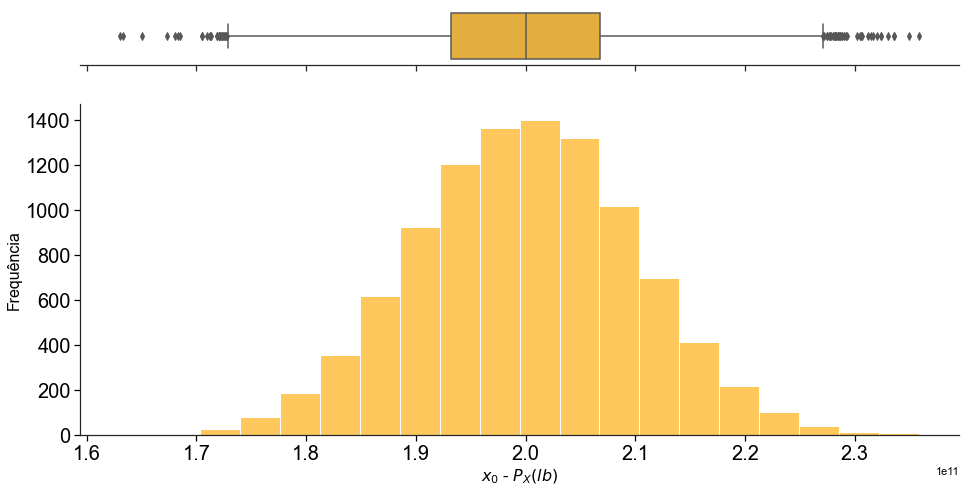

In [179]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'WIDTH': 0.40, 
                'HEIGHT': 0.20, 
                'X AXIS SIZE': 20,
                'Y AXIS SIZE': 20,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$x_0$ - $P_X (lb)$',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',  
                'CHART COLOR': '#FEB625',
                'KDE': False,
                'DPI': 600, 
                'BINS' : 20,
                'EXTENSION': '.svg'}
# RESULTS X_0 VARIABLE
OPCOES_DADOS = {'DATASET': DADOS, 'COLUMN': 'X_0'}      
# CALL PLOT
RASD_PLOT_1(OPCOES_DADOS, OPCOES_GRAFICAS)

In [ ]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'EXTENSION': '.svg',
                'DPI': 600,
                'WIDTH': 0.300, 
                'HEIGHT': 0.150,              
                'X DATA': 'S_0',
                'Y DATA': 'R_0',
                'X AXIS SIZE': 16,
                'Y AXIS SIZE': 16,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$S_0$',
                'Y AXIS LABEL': '$R_0$',
                'LABELS SIZE': 18,
                'LABELS COLOR': '#000000',
                'LOC LEGEND': 'lower right',
                'TITLE LEGEND': 'Failure index ($I$):'}
# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'S_0', 'Y DATA': 'R_0', 'HUE VALUE': 'I_0'}    
# CALL PLOT
RASD_PLOT_2(OPCOES_DADOS, OPCOES_GRAFICAS)

In [ ]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'EXTENSION': '.svg',
                'DPI': 600,
                'WIDTH': 0.20, 
                'HEIGHT': 0.10,              
                'X DATA': 'S_0',
                'Y DATA': 'R_0',
                'X AXIS SIZE': 20,
                'Y AXIS SIZE': 20,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$S_0$',
                'Y AXIS LABEL': '$R_0$',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',
                'G VALUE': 'G_0',
                'TRANSPARENCY': 0.8,
                'COLOR MAP': 'viridis'}


# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'S_0', 'Y DATA': 'R_0', 'G VALUE': 'G_0'}       

# CALL PLOT
RASD_PLOT_3(OPCOES_DADOS, OPCOES_GRAFICAS)

In [ ]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                    'EXTENSION': '.svg',
                    'DPI': 600,
                    'WIDTH': 0.20,
                    'HEIGHT': 0.10,
                    'X DATA': 'S_0',
                    'Y DATA': 'R_0',
                    'X AXIS SIZE': 20,
                    'Y AXIS SIZE': 20,
                    'AXISES COLOR': '#00000',
                    'X AXIS LABEL': '$Z_0$',
                    'Y AXIS LABEL': 'Frequência',
                    'LABELS SIZE': 16,
                    'LABELS COLOR': '#000000',
                    'C VALUE': 'G_0',
                    'TRANSPARENCY': 0.8,
                    'COLOR MAP': 'viridis',
                    'BINS': '50',
                    'ALPHA': '0.5'}

# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'R_0', 'Y DATA': 'S_0', 'G VALUE': 'G_0'}         

# CALL PLOT
RASD_PLOT_4(OPCOES_DADOS, OPCOES_GRAFICAS)

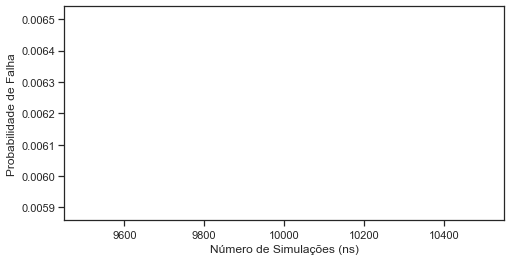

In [71]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                    'EXTENSION': '.svg',
                    'DPI': 600,
                    'WIDTH': 0.20,
                    'HEIGHT': 0.10,
                    'X AXIS SIZE': 20,
                    'Y AXIS SIZE': 20,
                    'AXISES COLOR': '#000000',
                    'X AXIS LABEL': 'Número de Simulações (ns)',
                    'Y AXIS LABEL': 'Probabilidade de Falha',
                    'LABELS SIZE': 16,
                    'LABELS COLOR': '#000000',
                    'CHART COLOR': 'black',
                    'POPULATION' : POP,
                    'TYPE' : 'pf'}

# RESULTS
OPCOES_DADOS = {'DATASET': RESULTS_TEST}       

# CALL PLOT
RASD_PLOT_5(OPCOES_DADOS, OPCOES_GRAFICAS)

In [ ]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                    'EXTENSION': '.svg',
                    'DPI': 600,
                    'WIDTH': 0.20,
                    'HEIGHT': 0.10,
                    'X AXIS SIZE': 20,
                    'Y AXIS SIZE': 20,
                    'AXISES COLOR': '#000000',
                    'X AXIS LABEL': 'Número de Simulações (ns)',
                    'Y AXIS LABEL': 'Beta',
                    'LABELS SIZE': 16,
                    'LABELS COLOR': '#000000',
                    'CHART COLOR': 'black',
                    'POPULATION' : POP,
                    'TYPE' : 'beta'}

# RESULTS
OPCOES_DADOS = {'DATASET': RESULTS_TEST}       

# CALL PLOT
RASD_PLOT_5(OPCOES_DADOS, OPCOES_GRAFICAS)

In [48]:
 A = [-91687.92803007364,
 -12132.89606705308,
 58047.135892510414,
 118852.16785293818,
 170282.19981351495,
 -212337.23177555203]

 b = [1,23,45]

 max(A)

170282.19981351495